In [38]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow.keras.utils import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import *

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(tf.config.list_physical_devices('GPU'))
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.3
Scikit-Learn 0.22.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available


In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', 'r')
    train_set_x_orig = np.array(train_dataset['train_set_x'][:])
    train_set_y_orig = np.array(train_dataset['train_set_y'][:])
    
    test_dataset = h5py.File('datasets/test_signs.h5', 'r')
    test_set_x_orig = np.array(test_dataset['test_set_x'][:])
    test_set_y_orig = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    train_set_y_orig = train_set_y_orig.reshape(train_set_y_orig.shape[0])
    test_set_y_orig  = test_set_y_orig.reshape(test_set_y_orig.shape[0])

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes= load_dataset()

y =4


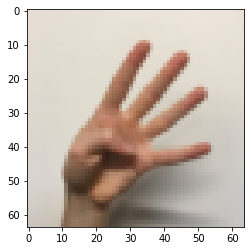

In [5]:
#Example of a Picture
index = 60
plt.imshow(train_x_orig[index])
print('y =' + str(np.squeeze(train_y_orig[index])))

In [7]:
def prep_pixels():
    train_x = train_x_orig/255
    train_y = to_categorical(train_y_orig)
    test_x = test_x_orig/255
    test_y = to_categorical(test_y_orig)
    
    print('Number of training examples = ' + str(train_x.shape[0]))
    print('Number of test Examples ' + str(test_x.shape[0]))
    print('Train X shape' + str(train_x.shape))
    print('Train Y shape' + str(train_y.shape))
    print('Test X Shape' + str(test_x.shape))
    print('Test Y Shape' + str(test_y.shape))
    
    return train_x, train_y, test_x, test_y

In [9]:
train_x, train_y, test_x, test_y = prep_pixels()    

Number of training examples = 1080
Number of test Examples 120
Train X shape(1080, 64, 64, 3)
Train Y shape(1080, 6)
Test X Shape(120, 64, 64, 3)
Test Y Shape(120, 6)


In [17]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(16, (5,5), (1,1), name = 'conv0')(X)
    X = BatchNormalization(axis=-1, name = 'bn0')(X)
    X = MaxPooling2D((2,2), name = 'Max_Pool_0')(X)
    
    X = Conv2D(32, (3,3), (1,1), name = 'conv1')(X)
    X = BatchNormalization(axis=-1, name='bn1')(X)
    X = MaxPooling2D((2,2), name = 'max_pool_1')(X)
    
    X = Flatten()(X)
    
    X = Dense(6, activation='softmax', name = 'fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'Sign_Recognize')
    
    return model

In [19]:
sign_model = model(train_x.shape[1:])
sign_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [20]:
sign_model.fit(train_x, train_y, epochs = 20, batch_size=16)

Train on 1080 samples
Epoch 1/20
1080/1080 [==============================] - 4s 3ms/sample - loss: 1.5091 - accuracy: 0.5204
Epoch 2/20
1080/1080 [==============================] - 0s 335us/sample - loss: 0.3555 - accuracy: 0.8824

In [31]:
preds = sign_model.evaluate(test_x, test_y)
print('Loss: ' + str(preds[0]))
print('Test Acc: ' + str(preds[1] *100))

120/120 [==============================] - 0s 542us/sample - loss: 0.1153 - accuracy: 0.9667
Loss: 0.115252331768473
Test Acc: 96.66666388511658


My image shape (1, 64, 64, 3)
2


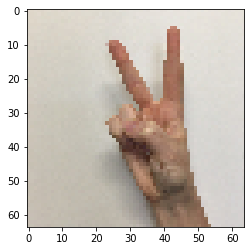

In [36]:
img_path = 'images/my_image.jpg'
img = load_img(img_path, target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255
print('My image shape', x.shape)
plt.imshow(img)
predicitons = sign_model.predict(x)
print(np.argmax(predicitons[0]))

In [37]:
sign_model.save('sign_model.h5')